# <div align="center"> **Jupyter for working with cars dataset** </div>

#### **Import libraries for machine learning processes**

In [260]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer, explained_variance_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRFRegressor
import pickle
import joblib
import multiprocessing
from matplotlib.figure import Figure

## <div align="center"> **Describe and analyze data** </div>

Data was prepared beforehand. That means, that original `.csv` file differs from that, what we use here.

In [261]:
data = pd.read_csv("car_price_prediction.csv")

Lets quickly inspect the structure and content of a DataFrame, because it allows us to get a sense of the data without displaying the entire DataFrame

In [262]:
data.head()

,Price,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Turbo
0,13328,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,False
1,16621,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,False
2,8467,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,False
3,3607,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,False
4,11726,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,False


Let us quickly obtain a concise summary of the DataFrame's structure, including information on the data types, non-null counts, and memory usage

In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Model             19237 non-null  object 
 3   Prod. year        19237 non-null  int64  
 4   Category          19237 non-null  object 
 5   Leather interior  19237 non-null  bool   
 6   Fuel type         19237 non-null  object 
 7   Engine volume     19237 non-null  float64
 8   Mileage           19237 non-null  int64  
 9   Cylinders         19237 non-null  float64
 10  Gear box type     19237 non-null  object 
 11  Drive wheels      19237 non-null  object 
 12  Doors             19237 non-null  int64  
 13  Wheel             19237 non-null  object 
 14  Color             19237 non-null  object 
 15  Turbo             19237 non-null  bool   
dtypes: bool(2), float64(2), int64(4), object

Now we need to generate descriptive statistics of the DataFrame's numerical columns. 
This method provides **key statistical measures**, such as `mean`, `standard deviation`, `minimum`, `maximum`, and `quartiles`, offering insights into the `distribution` and `central tendencies` of the numeric data within the DataFrame.

In [264]:
data.describe()

,Price,Prod. year,Engine volume,Mileage,Cylinders,Doors
count,1.923700e+04,19237.000000,19237.000000,1.923700e+04,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,2.306118,1.532236e+06,4.582991,3.925872
std,1.905813e+05,5.668673,0.859071,4.840387e+07,1.199933,0.403399
min,1.000000e+00,1939.000000,0.000000,0.000000e+00,1.000000,2.000000
25%,5.331000e+03,2009.000000,1.800000,7.013900e+04,4.000000,4.000000
50%,1.317200e+04,2012.000000,2.000000,1.260000e+05,4.000000,4.000000
75%,2.207500e+04,2015.000000,2.500000,1.888880e+05,4.000000,4.000000
max,2.630750e+07,2020.000000,7.300000,2.147484e+09,16.000000,5.000000


Now we are interested in getting acknowledge with overall number of rows and columns

In [265]:
print(f"So, the number of rows is: {str(data.shape[0])}. The number of columns is: {str(data.shape[1])}.")

So, the number of rows is: 19237. The number of columns is: 16.


Now we want to find unique values in each column. Let us do this by `pd.unique`, however it cannot display all data because it is too big.

In [266]:
pd.set_option('display.max_rows', None)  # Set pandas display.max_rows to None to display all rows
data.apply(pd.unique)

Price               [13328, 16621, 8467, 3607, 11726, 39493, 1803,...
Manufacturer        [LEXUS, CHEVROLET, HONDA, FORD, HYUNDAI, TOYOT...
Model               [RX 450, Equinox, FIT, Escape, Santa FE, Prius...
Prod. year          [2010, 2011, 2006, 2014, 2016, 2013, 2007, 199...
Category            [Jeep, Hatchback, Sedan, Microbus, Goods wagon...
Leather interior                                        [True, False]
Fuel type           [Hybrid, Petrol, Diesel, CNG, Plug-in Hybrid, ...
Engine volume       [3.5, 3.0, 1.3, 2.5, 2.0, 1.8, 2.4, 4.0, 1.6, ...
Mileage             [186005, 192000, 200000, 168966, 91901, 160931...
Cylinders           [6.0, 4.0, 8.0, 1.0, 12.0, 3.0, 2.0, 16.0, 5.0...
Gear box type                [Automatic, Tiptronic, Variator, Manual]
Drive wheels                                       [4x4, Front, Rear]
Doors                                                       [4, 2, 5]
Wheel                                  [Left wheel, Right-hand drive]
Color               

## <div align="center"> **Inspection for outliers** </div>

We have to check if data contains some values, that are laying too far from normal and thus can influence our future model.

**Criteria**: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

![](doc/z-score.png)

Data points that lie 1.5 times of IQR above Q3 and below Q1 are outliers. This shows in detail about outlier treatment in Python.

![](doc/iqr.png)

Steps
- Sort the dataset in ascending order
- calculate the 1st and 3rd quartiles(Q1, Q3)
- compute $IQR=Q3-Q1$
- compute $lower\_bound = (Q1–1.5\cdot IQR)$, $upper\_bound = (Q3+1.5\cdot IQR)$
- loop through the values of the dataset and check for those who fall below the lower bound and above the upper bound and mark them as outliers

To utilize this, function `detect_outliers` was created. It returns indices, that are too much of a difference with all values.

We mainly have to deal with `Price` and `Mileage`, as they are main "numeric" values that's range is far too big.

Before we start detecting outliers we need to be specific about our quartiles, because if we pick wrong percents then we will detect wrong outliers.

In [267]:
def print_ranges(column, q_one_percent, q_three_percent, threshold=1.5):
    Q1 = np.percentile(data[column], q_one_percent)
    Q3 = np.percentile(data[column], q_three_percent)
    IQR = Q3 - Q1
    outlier_step = IQR * threshold
    left = Q1 - outlier_step
    right = Q3 + outlier_step
    print(f"Ranges for {column}: from {left} to {right}")

For example let us do it the same procedure as it is said in documents and book, 25% and 75%.

In [268]:
print_ranges(["Mileage"], 25, 75)
print_ranges(["Price"], 25, 75)

Ranges for ['Mileage']: from -107984.5 to 367011.5
Ranges for ['Price']: from -19785.0 to 47191.0


We seet that 0-1000 km mileage does not count, but it should be! Because it is too small numbers. Same for price. So we better specify percents for inspecting low values.

In [269]:
print_ranges(["Mileage"], 64.9, 90)
print_ranges(["Price"], 68.8, 86)

Ranges for ['Mileage']: from 632.5 to 423956.5
Ranges for ['Price']: from 283.0 to 51011.0


**Now, too low values will be detected also!**

We initialize **`detect_outliers`** functions that gets `dataframe`, `columns`, `q_one_percent` , `q_three_percent` where we want detect outliers and `threshold` by which we choose which data should be deleted.

In [270]:
def detect_outliers(dataframe, column, q_one_percent, q_three_percent, threshold=1.5):
    outlier_indices = []  # List to store indices of outliers
    Q1 = np.percentile(dataframe[column], q_one_percent) # Calculate the first quartile (Q1)
    Q3 = np.percentile(dataframe[column], q_three_percent) # Calculate the third quartile (Q3)
    IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)
    outlier_step = IQR * threshold # Define the outlier step

    # Find indices of outliers in the current column
    outlier_list_col = dataframe[(dataframe[column] < Q1 - outlier_step) | (dataframe[column] > Q3 + outlier_step)].index

    # Extend the outlier indices list with the indices found in the current column
    outlier_indices.extend(outlier_list_col)

    return outlier_indices

With a help of this function now we can find outliers. Let us see what is its amount.

In [271]:
outliers_mileage = detect_outliers(data, "Mileage", 64.9, 90)
outliers_price = detect_outliers(data, "Price", 68.8, 86)
print(f"So we found {len(outliers_mileage)} outliers in Miliage column.")
print(f"So we found {len(outliers_price)} outliers in Price column.")

So we found 1129 outliers in Miliage column.
So we found 1766 outliers in Price column.


Let's now check if these values are real outliers.

In [272]:
for number in range(5):
    print("Data with outlier has outlier: " + str(data.iloc[outliers_price[number]]["Price"]) + " dollars")
    print("Data with outlier has outlier: " + str(data.iloc[outliers_mileage[number]]["Mileage"]) + " km")

Data with outlier has outlier: 59464 dollars
Data with outlier has outlier: 0 km
Data with outlier has outlier: 30 dollars
Data with outlier has outlier: 0 km
Data with outlier has outlier: 125 dollars
Data with outlier has outlier: 0 km
Data with outlier has outlier: 51746 dollars
Data with outlier has outlier: 719847 km
Data with outlier has outlier: 220 dollars
Data with outlier has outlier: 0 km


As we can see, this line has too high `Mileage`, thus is an outlier. You will see in the next cells by provided details why data has to be cleaned.

Let us clean the data and reset indexes in order not to fail our dataset.

In [273]:
outliers = outliers_price + outliers_mileage
cleaned_data = data.drop(data.loc[outliers].index, axis=0)
cleaned_data = cleaned_data.reset_index(drop = True)
print(f"Rows remained: {cleaned_data.shape[0]}")

Rows remained: 16452


## <div align="center"> **Plotting data** </div>

First of all let us see how much data is distributed along each column and see exact amount for each of them. For this we initialize numerical columns.

In [274]:
numerical_columns = ['Price', 'Prod. year', 'Engine volume', 'Mileage', 'Cylinders', 'Doors']

Now we plot graphs where `x-axis` is numerical column, `y-axis` is `count`, so that we can see how much data for each column we have.

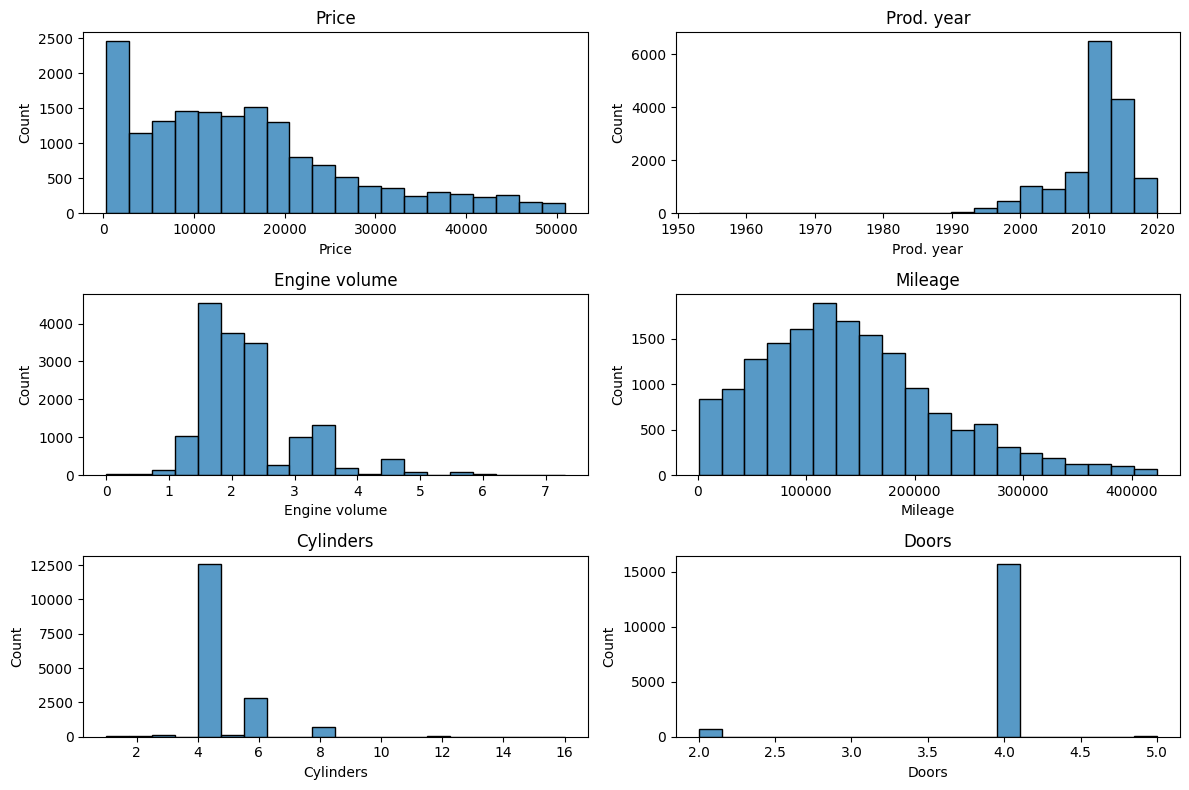

In [275]:
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 2, numerical_columns.index(feature) + 1)
    sns.histplot(data=cleaned_data[feature], bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()


1. Along `price` plot most of the cars are not so expensive
2. Along `production year` plot most of the cars are mostly new-made
3. Along `engine volume` plot most of the cars' volume is between **1.4** and **2.4**
4. Along `mileage` plot most of the cars have drivven more than **50** thousands of km but less than **200** thousands of km
5. Along `cylinders` plot most of the cars have **4** cylinders, so it is most commont type of engine
6. Along `doors` plot most of the cars have **4** doors and only few of them have **2** doors

### <div align="center"> **Compare unprepared data with prepared data** </div>

This is what original data looks like (with a lot of outliers)

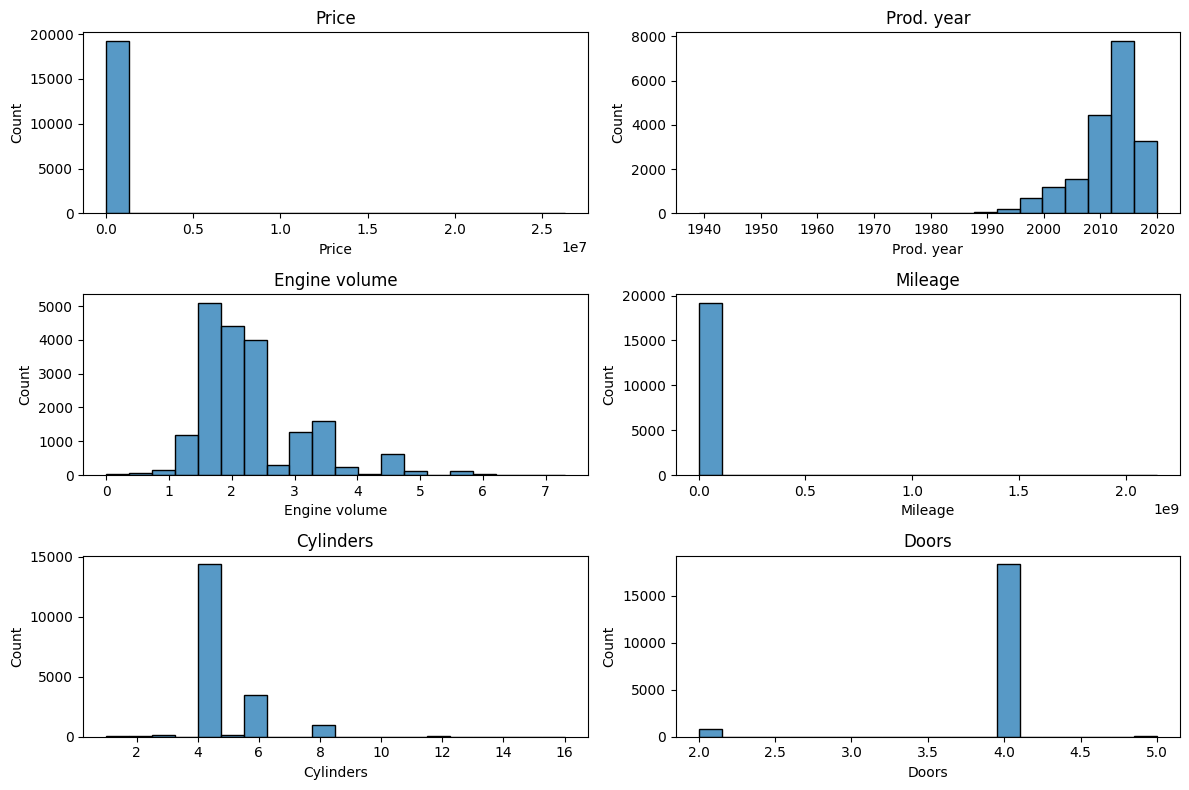

In [276]:
plt.figure(figsize=(12, 8))
for feature in numerical_columns:
    plt.subplot(3, 2, numerical_columns.index(feature) + 1)
    sns.histplot(data=data[feature], bins=20)
    plt.title(feature)
plt.tight_layout()
plt.show()

Now we see that previously plotted data were much much better regarding distribution along `x-axis`

### <div align="center"> **How data is split among categories** </div>

Let's plot cathegorical columns

In [277]:
cleaned_data.columns

Index(['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Turbo'],
      dtype='object')

We need only categorical columns, so we write them separately from other columns

In [278]:
categorical_columns = ['Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

1. Then we need to use subplots function from the Matplotlib library in Python to create a set of subplots in a single figure and flatten the 2D array of axes
2. Loop through each categorical column and append data to the plot
3. Annotate axes, set titles, set labels and legends
4. Adjust layout and show plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


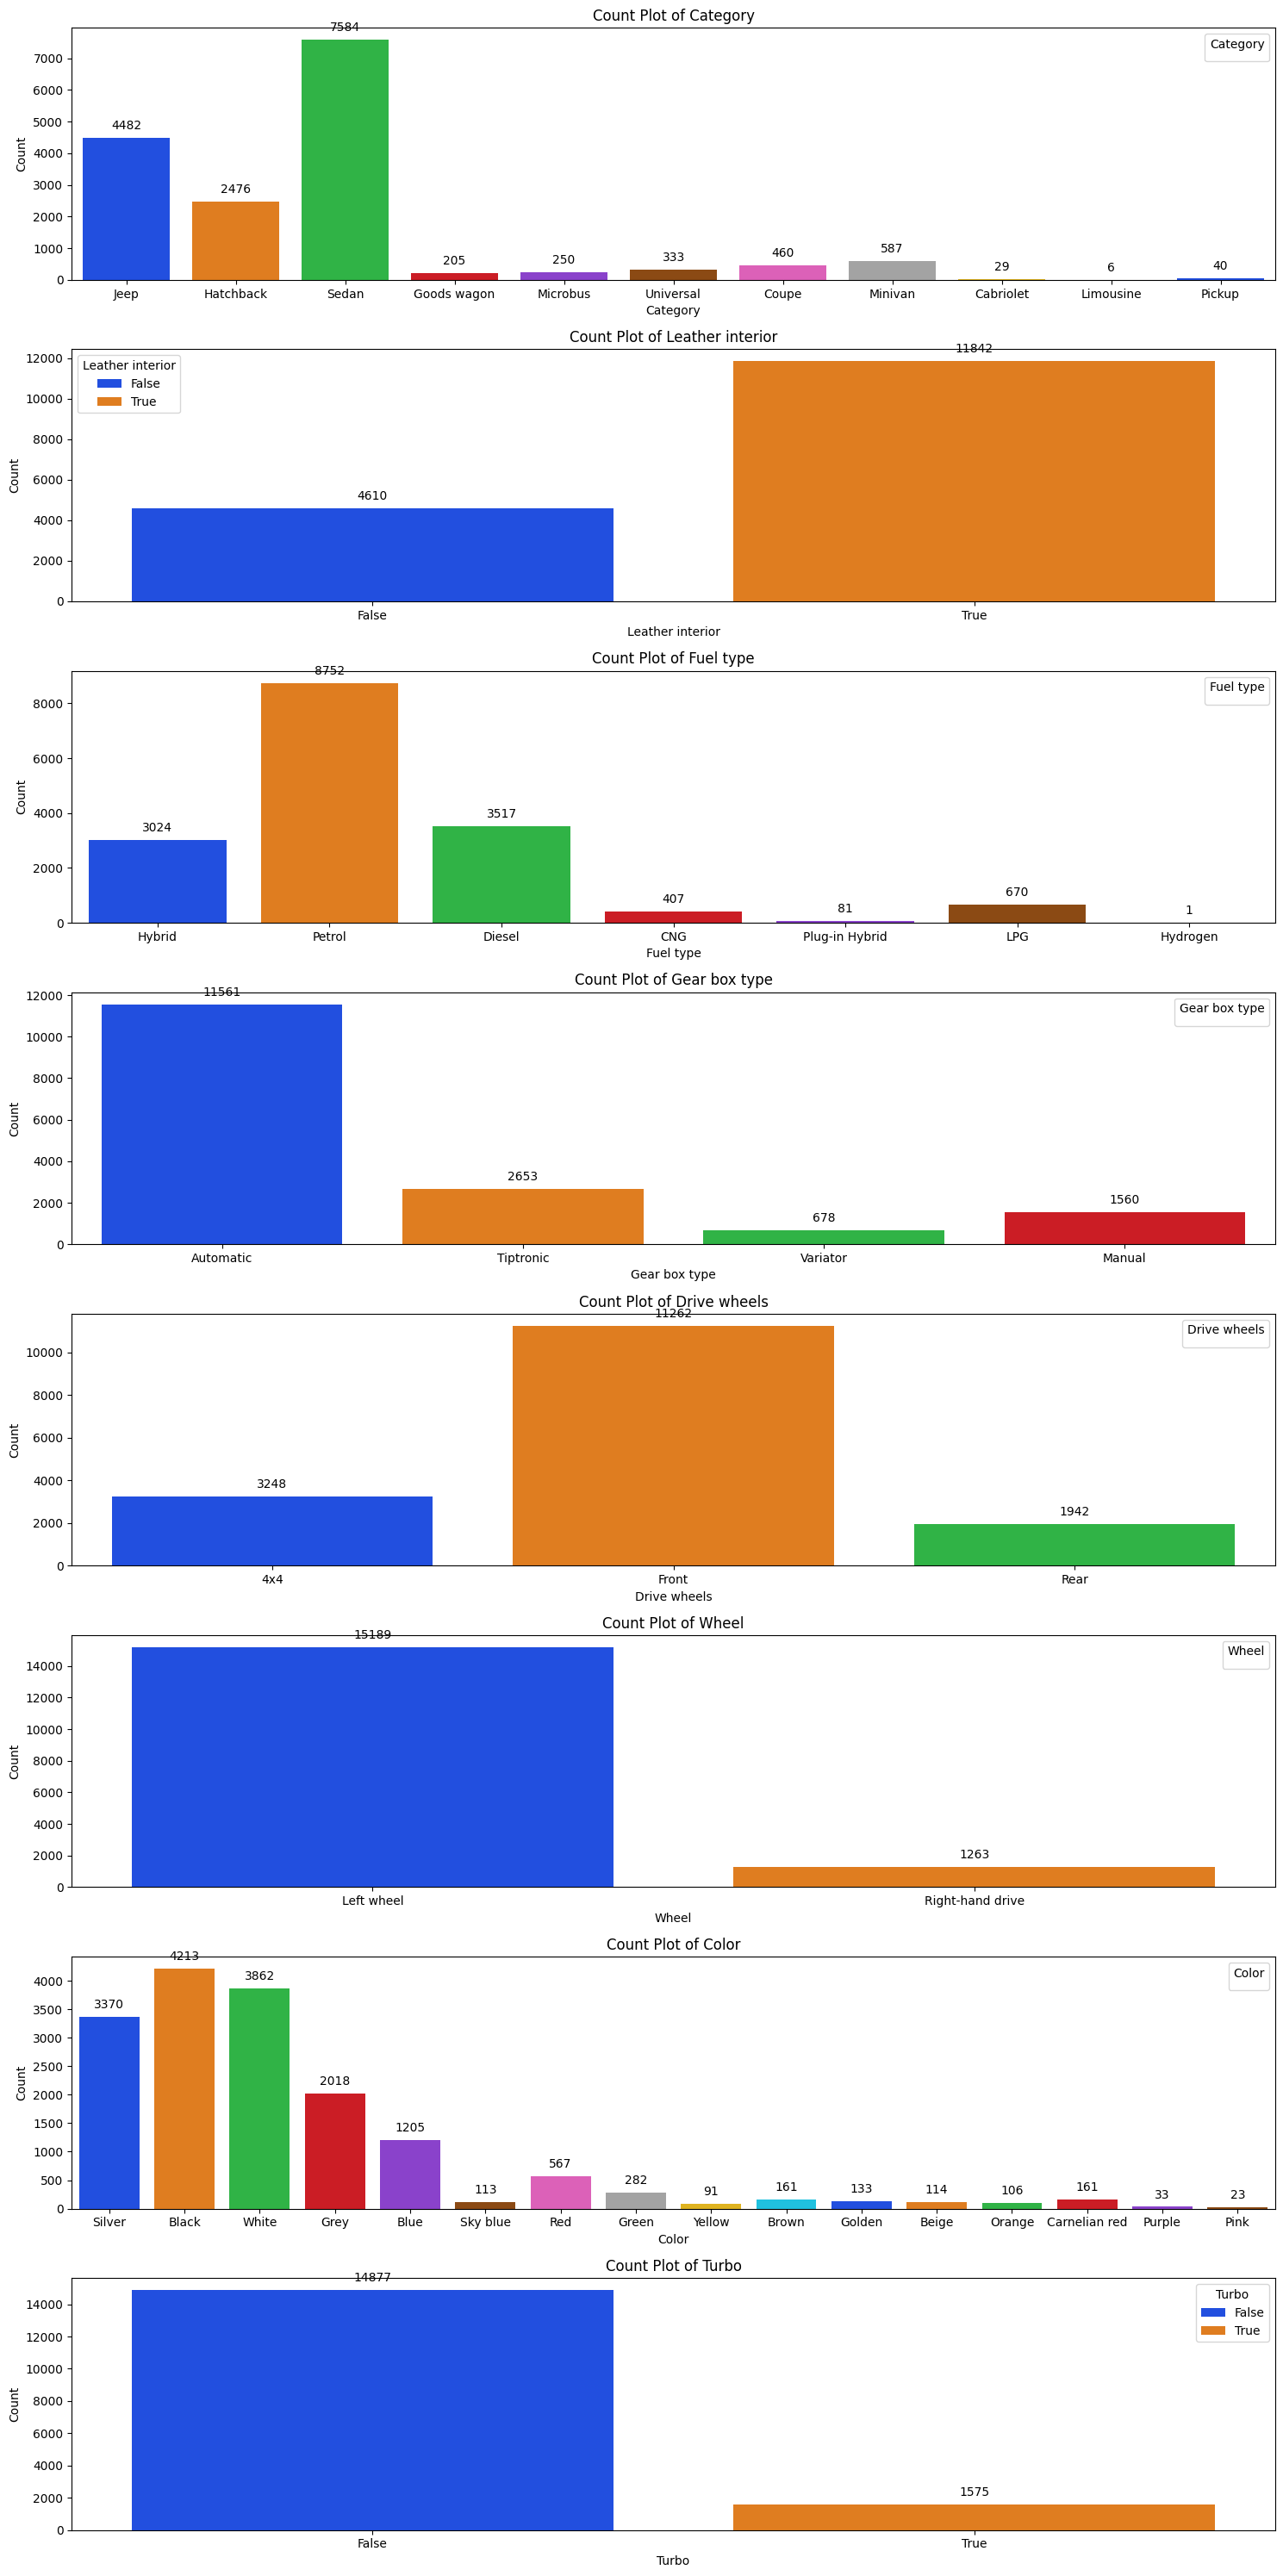

In [279]:
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(15, 30))
axes = axes.ravel() 

for i, column in enumerate(categorical_columns):
    sns.countplot(x=column, data=cleaned_data, ax=axes[i], palette="bright", hue=column)
    for p in axes[i].patches:
        # We need to check if the height of the bar is greater than 0 before labeling
        if p.get_height() > 0:
            axes[i].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                             ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                             color='black', size=10)
    axes[i].set_title(f'Count Plot of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].legend(title=column)

plt.tight_layout()
plt.show()

#### Now with a help of these graphs we see how the data is distributed in categorical columns.
For example:
- most of the cars are either silver, black, white, or grey
- almost all cars have left steering wheel
- most cars have front driving wheels
and so on...

### <div align="center"> **Which cars are sold the most by picking random number of top car models** </div>

In [280]:
number_of_models_to_show = 20
top_car_models = cleaned_data['Model'].value_counts().head(number_of_models_to_show)
top_car_models

Model
Prius         898
Elantra       882
Camry         846
Sonata        779
E 350         495
H1            426
Santa FE      404
Tucson        389
FIT           350
Aqua          310
Cruze         291
X5            274
Fusion        263
Optima        211
Transit       188
Actyon        188
Jetta         187
Highlander    180
REXTON        160
GX 460        154
Name: count, dtype: int64

Now it will be better if we plot this data for better observation. Better to use barplot.

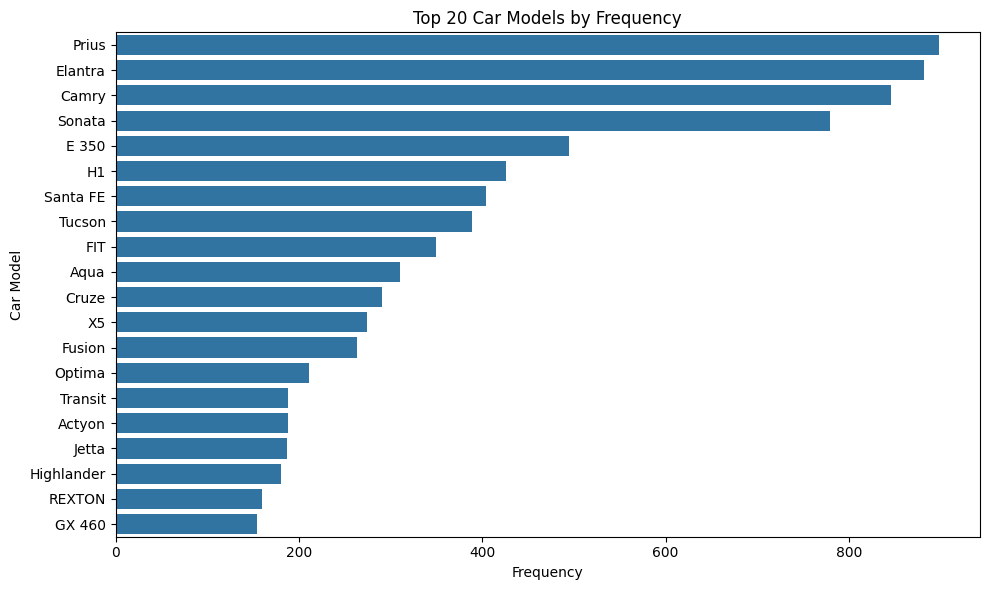

In [281]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {number_of_models_to_show} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

So, most cars that people want to sell are: `prius`, `elantra`, `camry` and `sonata`.

### <div align="center"> **Feature vs Price** </div>

In this chapter we will try to find most influencial cathegory on price. For this goal we need to plot boxplots for every categorical column to see if their distribution ranges along price.

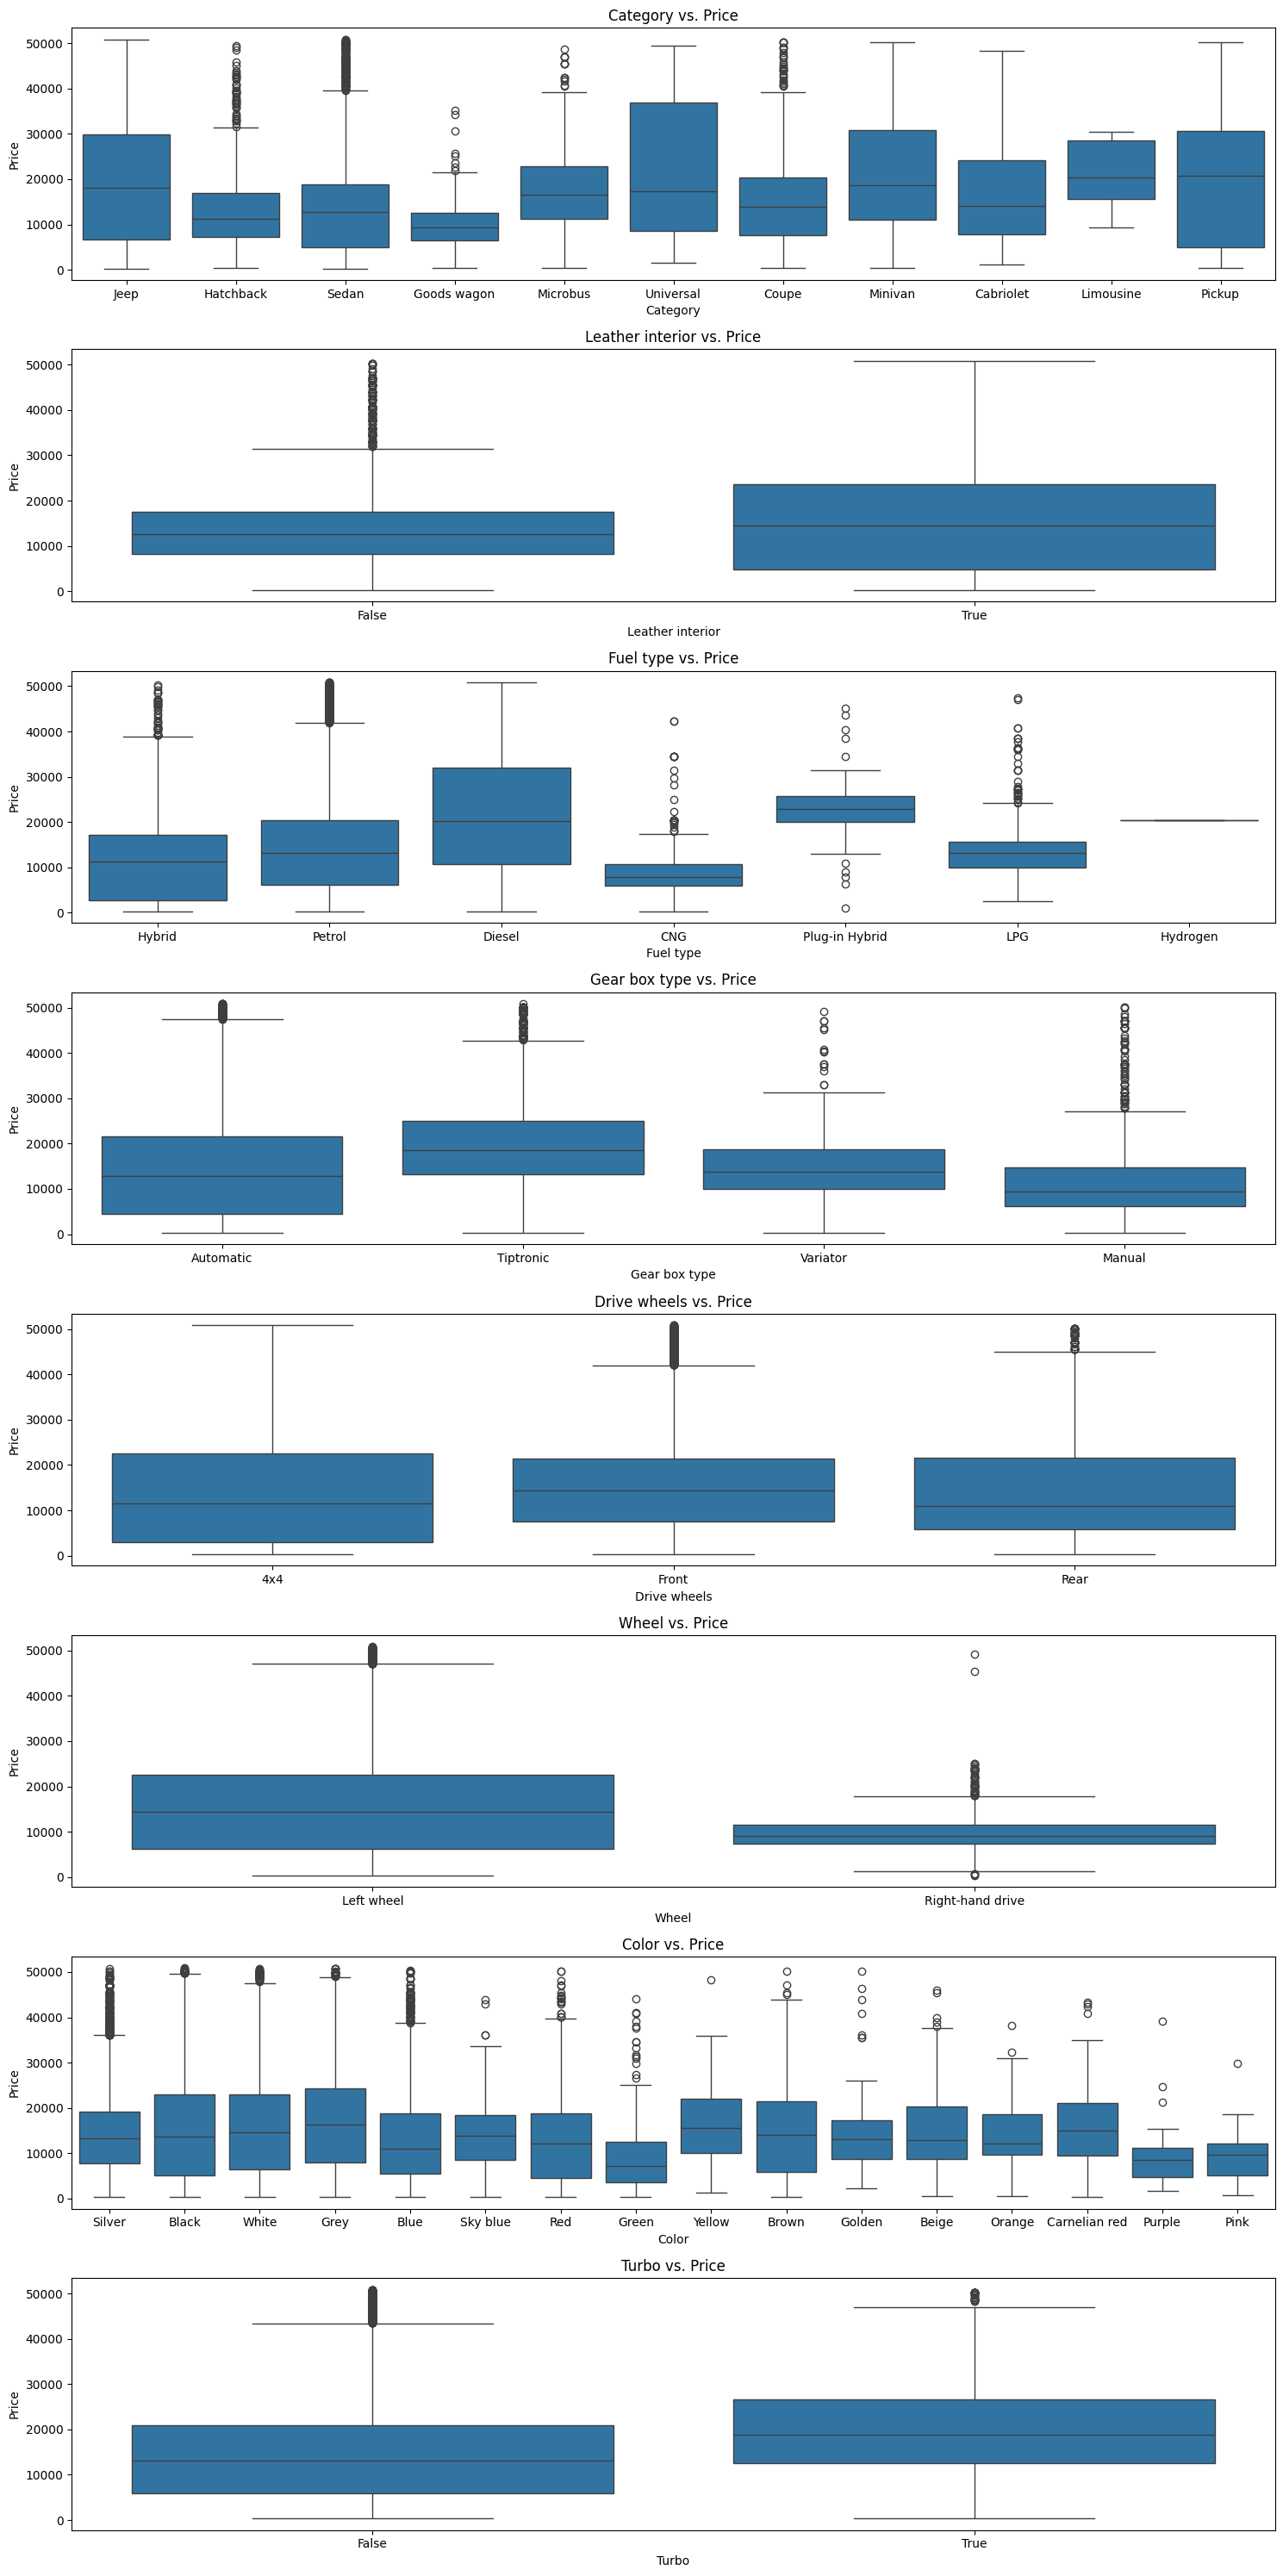

In [282]:
plt.figure(figsize=(15, 30))
for feature in categorical_columns:
    plt.subplot(8, 1, categorical_columns.index(feature) + 1)
    sns.boxplot(data=cleaned_data, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
plt.tight_layout()
plt.show()

Even with a simple glance, we can draw several simple conclusions from these graphs:
1. `The category` in which the car is located (be it a hatchback, or a limousine or a pickup truck) varies greatly in price and has a lot of foreign data. Therefore, this column greatly influences the final price prediction.
2. `Leather interior` also influences the price becase if interior is leather then it is more often to happen that price is bigger than it was not.
3. `Fuel type` also does, because for example diesel has bigger distribution in bigger prices than other types.
4. `Gear box` type does not so much influences but still makes impact.
5. `Drive wheel` almost does not impact.
6. `Steering wheel` does impact, but we have only few examples of right sterring wheel cars compared to left. So we better not to rely.
7. `Color` is absolutely meaningless feauture, that is why we will drop it later. I guess everybody would agree with us.
8. `Turbo` influences a lot, because it is clearly observable that turbo-equiped cars are more likely to be a little bit more expensive than not turbo-equiped.  

### <div align="center"> **Correlation analysis** </div>

Lastly, let's focus on doing the correlation heatmap, so that we better see which `numerical` columns impact **price**.

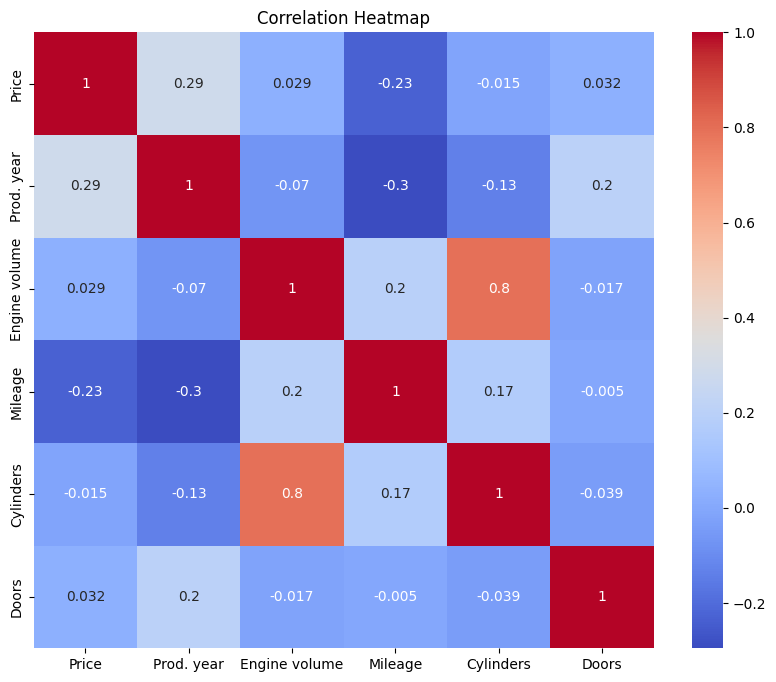

In [283]:
correlation_matrix = cleaned_data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

By this plot we clearly see that most influential column regarding `price` of our dataset is `production year`, `engine volume` and `number of doors`.

Engine volume and cylinders are also almost fully correlated.

#### Now it will be helpful to make full understanding about how manufacturers impact the `price`. Because it is not a secret that some cars are much more expensive than others.

For this goal let us plot the boxplot of price by manufacturer.

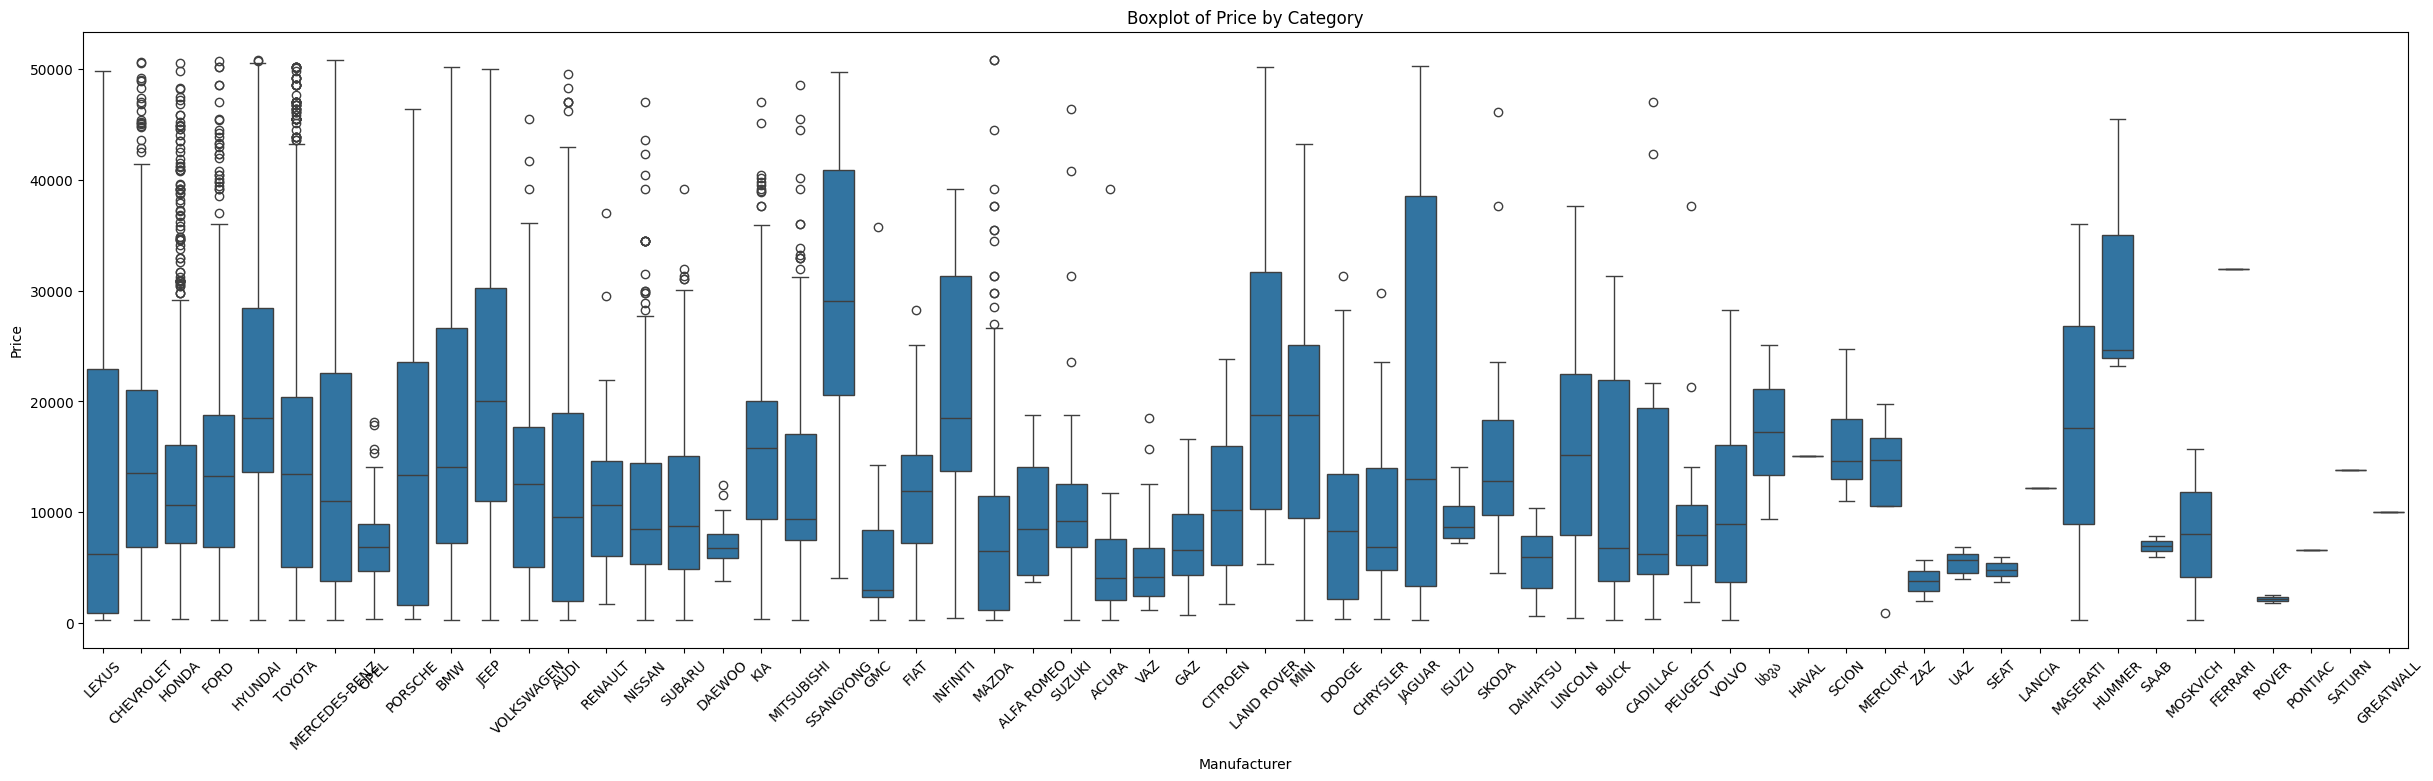

In [284]:
plt.figure(figsize=(30, 8))
sns.boxplot(x='Manufacturer', y='Price', data=cleaned_data)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Boxplot of Price by Category')
plt.xticks(rotation=45)
plt.show()

With a help of this graph we can see price category of each manufacturer. For example *Hummer*, *Maserati*, *Ssangyong*, *Infiniti*, *Jeep*, *Land Rover*, *Jaguar* and other cars that have box's upper boundary higher than others are more expensive than other cars because these cars are considered **luxuri**, **premium** class. Meanwhile *Acura*, *Vaz*, *Gaz*, *Daewoo* have lower boundary of box, so that means its overall price in general less than others. So, manufacturer influences future prediction.   

### <div align = "center"> Function to plot price depending on 2 factors (3D) <div/>

Good idea for better understanding of our dataset is 3d represantation.

We create `plot_3d_scatter` function. It is designed to create a 3D scatter plot using the `matplotlib` library. This function takes a DataFrame (`df`) and two variable names (`x_variable` and `y_variable`) as input and plots a 3D scatter plot in which the x and y axes represent the specified variables, and the z-axis represents the 'Price' variable.

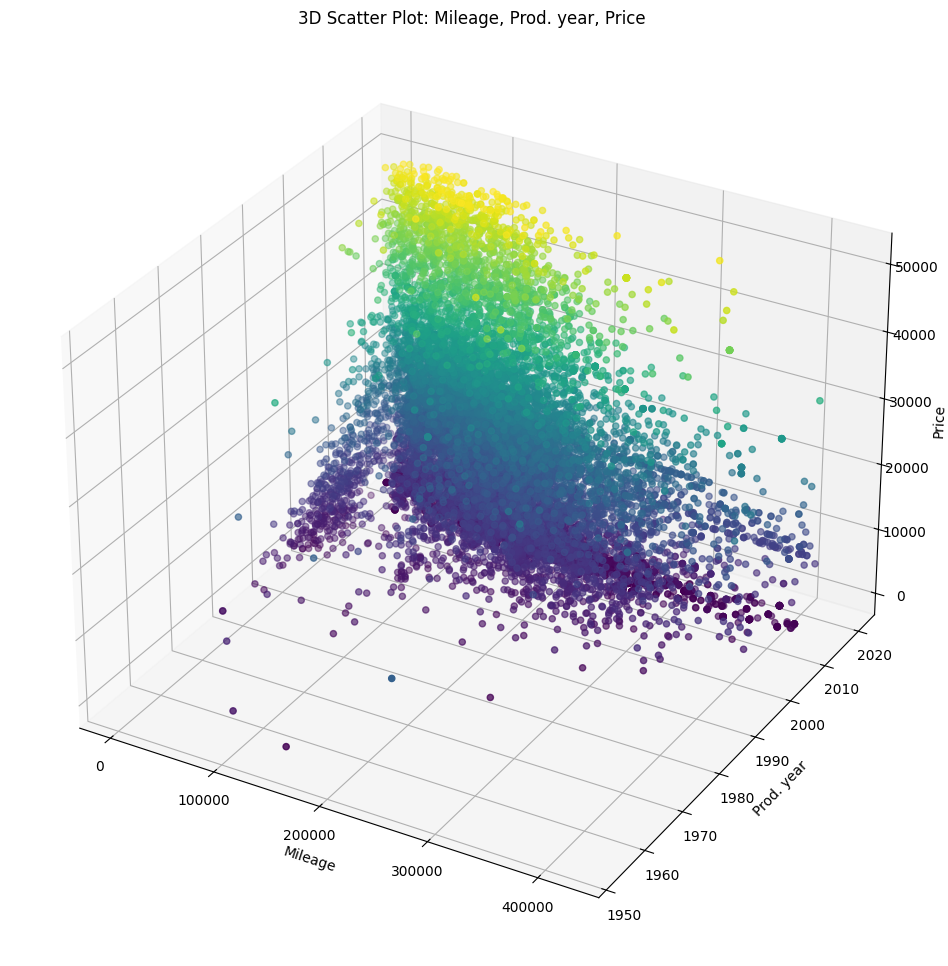

In [285]:
def plot_3d_scatter(df, x_variable, y_variable):
    if x_variable not in df.columns or y_variable not in df.columns:
        print(f"One or both of the variables {x_variable}, {y_variable} not found in DataFrame.")
        return

    fig = plt.figure(figsize=(16, 12))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x_variable], df[y_variable], df['Price'], c=df['Price'], cmap='viridis')
    ax.set_xlabel(x_variable)
    ax.set_ylabel(y_variable)
    ax.set_zlabel('Price')
    ax.set_title(f'3D Scatter Plot: {x_variable}, {y_variable}, Price')

plot_3d_scatter(cleaned_data, 'Mileage', 'Prod. year')


With a help of this graph we can make more than 1 conclusion:
- Production year influences price in a way that - newer cars have bigger price
- Mileage influences price in a way that - less mileage cars have bigger price

### <div align = "center">Function to plot price depending on 1 factor (2D)<div/>

Then we can create 2D Scatter Plot Function to see how different columns impact price

For this purpose we create `plot_2d_scatter` function. It is designed to create a 2D scatter plot using the `matplotlib` library. This function takes a DataFrame (`df`) and a single variable name (`variable`) as input, and it plots a 2D scatter plot where the x-axis represents the specified variable, the y-axis represents the 'Price' variable, and the color of each point corresponds to the 'Price' variable as well.


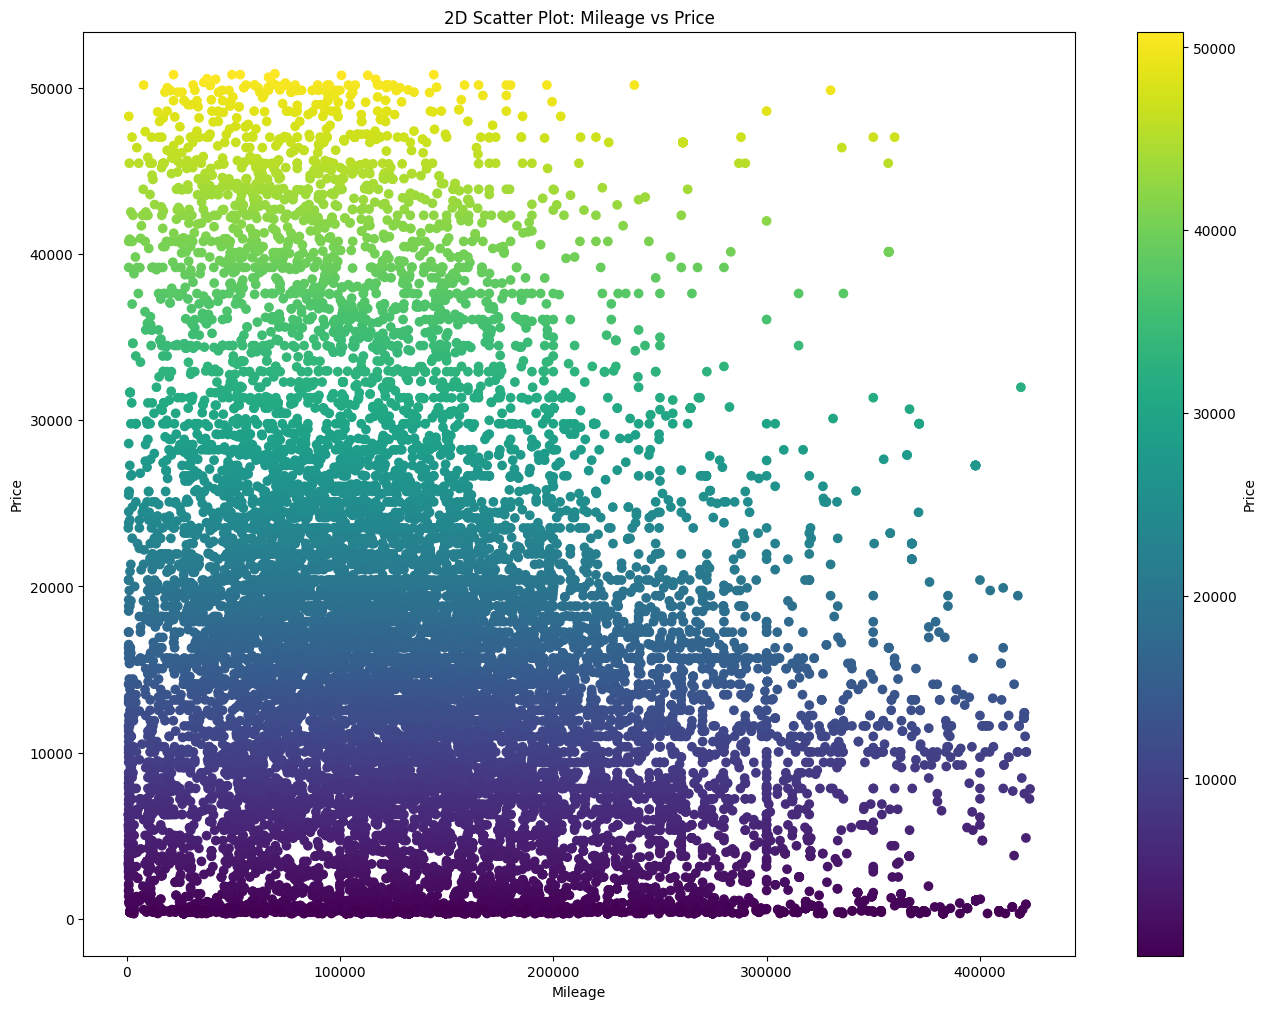

In [286]:
def plot_2d_scatter(df, variable):
    if variable not in df.columns:
        print(f"Variable {variable} not found in DataFrame.")
        return None

    fig = Figure(figsize=(16, 12))
    ax = fig.add_subplot(111)

    scatter = ax.scatter(df[variable], df['Price'], c=df['Price'], cmap='viridis')
    ax.set_xlabel(variable)
    ax.set_ylabel('Price')
    ax.set_title(f'2D Scatter Plot: {variable} vs Price')
    fig.colorbar(scatter, label='Price')

    return fig


plot_2d_scatter(cleaned_data, 'Mileage')

With a help of this graph we can make more than also 1 conclusion:
- Mileage influences price in a way that - less mileage cars have bigger price
- more tha 200000 km mileage cars are mostly cheap
- less than 200000 km mileage cars varies from cheap to expensive

## <div align="center"> **Preprocessing data before training models** </div>

First of all we need `LabelEncoder`, so that we can transform categorical variables in our dataset.

For this purpose we create an empty DataFrame `train_frame` to store the encoded data.

Then we create dictionary `transform_dict` to store the transformations for each categorical variable.



In [287]:
label_encoder = LabelEncoder()

transform_dict = {"Manufacturer" : {},
                  "Category" : {},
                  "Leather interior" : {},
                  "Fuel type" : {},
                  "Engine volume" : {},
                  "Gear box type" : {},
                  "Drive wheels" : {},
                  "Wheel" : {},
                  "Turbo" : {}}

train_frame = pd.DataFrame()
    

Then we need to encode categorical variables and populate the `transform_dict`.

In [288]:
for key in transform_dict:
    label_encoder = LabelEncoder()
    train_frame[key] = label_encoder.fit_transform(cleaned_data[key])
    transform_dict[key] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

Then we copy non-categorical columns (excluding **"Model"** and **"Color"**) to the new DataFrame.

In [289]:
for column in data.columns:
    if column not in train_frame.columns and column != "Model" and column != "Color":
        train_frame[column] = cleaned_data[column]

Finally we save the transformation dictionary to a pickle file for future usage.

In [290]:
with open('weights_variables/transform_dict.pkl', 'wb') as f:
    pickle.dump(transform_dict, f)
    
    
with open('weights_variables/train_frame.pkl', 'wb') as f:
    pickle.dump(train_frame, f)

Now we start next phase of preprocessing.

We initialize `StandardScaler` to standardize numerical features in our dataset. it involves transforming the data such that it has a mean of 0 and a standard deviation of 1. This process is also known as z-score normalization.

In [291]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_frame.drop(['Price'], axis=1))

For the next step we create a dictionary to store unique values for numerical columns (excluding 'Price').

In [292]:
unique_values_dict = {col: set(train_frame[col].unique()) for col in numerical_columns if col != "Price"}

Then we create a dictionary to store mappings for certain numerical columns and populate `load_dict` with mappings for specified numerical columns.

In [293]:
load_dict = {
    "Prod. year":{},
    "Doors":{},
    "Cylinders":{}
}

for key in load_dict:
    load_dict[key] = dict(zip(map(int, train_frame[key].unique()), map(int, train_frame[key].unique())))

Finally we dump data to the pickle files to use them later in our project.

In [294]:
export_dict = load_dict | transform_dict
with open('weights_variables/export_dict.pkl', 'wb') as f:
    pickle.dump(export_dict, f)

with open('weights_variables/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## <div align="center"> **Train and work with models** </div>

Before we start training models we need to split data for train and test. Train data is data used for training model, test data used for testing accuracy and other metrics.

In [295]:
X_train, X_test, y_train, y_test = train_test_split(scaled_data, train_frame['Price'], test_size=0.2, random_state = 123)

### **Linear Regression**

First model is `Linear Regression`. Why? Linear regression is a statistical method used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.

In [296]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

Before testing this model we better save trained weights for future usage.

In [297]:
joblib.dump(lin_reg, 'weights_variables/lin_reg.joblib')

['weights_variables/lin_reg.joblib']

Now we need to predict outcome from test data. Then we compare predicted value with actual value and compute mean squared error. Root Mean Squared Error (RMSE) is a commonly used metric for evaluating the accuracy of a predictive model. It measures the average magnitude of errors between predicted and actual values, taking the square root of the mean of squared differences. 

In [298]:
y_pred = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
round(lin_rmse)

10743

Lets test for r2 score. Yes, absolutely! R-squared \(R^2\) is commonly used with regression problems to assess the goodness of fit of the model. In the context of regression, \(R^2\) measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. \(R^2\) value close to 1 indicates that a high proportion of the variance in the dependent variable is explained by the model.

In [299]:
str(round(r2_score(y_test, y_pred), 4)*100) + "%"

'20.77%'

Lets test for explained variance score. Measures the proportion of the variance in the target variable explained by the model. Takes values between 0 and 1, where 1 indicates a perfect fit.

In [300]:
str(round(explained_variance_score(y_test, y_pred), 4)*100) + "%"

'20.82%'

10743 as `rmse`, 20.77% as `r2` and 20.82% as `evs` is actually not bad for this model.

We can try to improve result by cross validation score. `Cross-validation score` is a technique used in machine learning to assess the performance of a model by repeatedly splitting the dataset into training and testing subsets.

In [301]:
scores_lin_reg = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

print("Mean Cross-Validation Score (negative mean squared error):", round(np.sqrt(abs(np.mean(scores_lin_reg)))))

Mean Cross-Validation Score (negative mean squared error): 10529


### **Decision Tree**

Second model is `Decision Tree`. Why? A decision tree is a supervised machine learning algorithm used for both classification and regression tasks. It recursively splits the dataset into subsets based on the most significant feature at each node, creating a tree-like structure. The goal is to partition the data in a way that optimally minimizes variance.

In [302]:
tree_reg = DecisionTreeRegressor(random_state = 123)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

Before testing this model we better save trained weights for future usage.

In [303]:
joblib.dump(tree_reg, 'weights_variables/tree_reg.joblib')

['weights_variables/tree_reg.joblib']

Now we need to predict outcome from test data and calculate rmse so that we can compare this model with the previous one and next models too.

In [304]:
tree_predictions = tree_reg.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
round(tree_rmse)

8749

Lets test for r2 score.

In [305]:
str(round(r2_score(y_test, tree_predictions), 6) * 100) + "%"

'47.4491%'

In [306]:
str(round(explained_variance_score(y_test, tree_predictions), 4)*100) + "%"

'47.5%'

8749 for `rmse`, 47.4491% for `r2` and 47.5% for `evs` is also not bad for this model.

We can try to improve result by cross validation score.

In [307]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)
round(tree_rmse_scores.mean())

8575

### **Random Forest**

Third model is `Random Forest`. Why? Random Forest is an ensemble learning method that combines multiple decision trees to enhance predictive accuracy and reduce overfitting. It is used for both classification and regression tasks. Random Forest builds a forest of trees by training each tree on a random subset of the data and making decisions based on a random subset of features.

In [308]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123, n_jobs = multiprocessing.cpu_count())
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=20, random_state=123)

Before testing this model we better save trained weights for future usage.

In [309]:
joblib.dump(forest_reg, 'weights_variables/forest_reg.joblib')

['weights_variables/forest_reg.joblib']

Now we need to predict outcome from test data and calculate rmse so that we can compare this model with the previous models and next models too.

In [310]:
forest_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

6556.67921619803

Lets test for r2 score.

In [311]:
str(round(r2_score(y_test, forest_predictions), 4) * 100) + "%"

'70.49%'

Lets test for evs score.

In [312]:
str(round(explained_variance_score(y_test, forest_predictions), 4) * 100) + "%"

'70.53%'

This result cannot be counted as final one, because random forest finds best decision tree on a subset of data, so it would be perfect if we count rmse by training 5 different random forests on different subsets and then compute mean RMSE.

In [313]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5, n_jobs = multiprocessing.cpu_count())
forest_rmse_scores = np.sqrt(abs(forest_scores))
print(f"{[round(forest) for forest in forest_rmse_scores]}: are scores in 5 differents subsets, let us compute mean now.")
print(f"Mean result is {round(forest_rmse_scores.mean())}")

[6541, 6468, 6537, 6601, 6343]: are scores in 5 differents subsets, let us compute mean now.
Mean result is 6498


Lets test for r2 score.

In [314]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="r2", cv=5, n_jobs=multiprocessing.cpu_count())

print(f"Mean R-squared score: {str(round(np.mean(forest_scores), 4)*100)}%")

Mean R-squared score: 69.56%


Lets test for evs score.

In [315]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="explained_variance", cv=5, n_jobs=multiprocessing.cpu_count())

mean_explained_variance = np.mean(forest_scores)
print(f"Mean explained variance score: {str(round(np.mean(forest_scores), 4)*100)}%")

Mean explained variance score: 69.57%


Now it look much better and confidential. 

### **Grid search**

Now it is better to see how hyperparameters influence the model's efficiency. For this purpose we would use `GridSearchCV`. It is a method in scikit-learn for hyperparameter tuning in machine learning models. It performs an exhaustive search over a specified hyperparameter grid, evaluating the model's performance for each combination of hyperparameters using cross-validation. The goal is to find the set of hyperparameters that maximizes or minimizes a specified performance metric. This systematic search helps identify the optimal configuration for a model, making it a powerful tool for model selection and performance optimization.

Firstly we specify hyperparameters that we want to check.

In [316]:
param_grid = [{'n_estimators': [200, 250, 300], 'max_features': [35, 25, 15], 'max_depth': [15, 20]}]

Secondly we initialize our `RandomForestRegressor` and `GridSearchCV` with all required parameters and tuning the model with training data.

In [317]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, n_jobs=multiprocessing.cpu_count())
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=20,
             param_grid=[{'max_depth': [15, 20], 'max_features': [35, 25, 15],
                          'n_estimators': [200, 250, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Thirdly, we dump weights of the model for future usage.

In [318]:
joblib.dump(grid_search, 'weights_variables/grid_search.joblib')

['weights_variables/grid_search.joblib']

Now, after training models we would like to know the best parameters.

In [319]:
print(f"Best parameters are: {grid_search.best_params_}")

Best parameters are: {'max_depth': 20, 'max_features': 35, 'n_estimators': 300}


Now, let us see overall perfomance of every model with given parameters.

In [320]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

best_rmse_result = round(np.sqrt(abs(max(cvres["mean_test_score"]))))
print(f"\nBut the best result is {best_rmse_result}.")

6630.040856161038 {'max_depth': 15, 'max_features': 35, 'n_estimators': 200}
6625.352633630676 {'max_depth': 15, 'max_features': 35, 'n_estimators': 250}
6622.280101351295 {'max_depth': 15, 'max_features': 35, 'n_estimators': 300}
6630.040856161038 {'max_depth': 15, 'max_features': 25, 'n_estimators': 200}
6625.352633630676 {'max_depth': 15, 'max_features': 25, 'n_estimators': 250}
6622.280101351295 {'max_depth': 15, 'max_features': 25, 'n_estimators': 300}
6630.040856161038 {'max_depth': 15, 'max_features': 15, 'n_estimators': 200}
6625.352633630676 {'max_depth': 15, 'max_features': 15, 'n_estimators': 250}
6622.280101351295 {'max_depth': 15, 'max_features': 15, 'n_estimators': 300}
6497.742880174747 {'max_depth': 20, 'max_features': 35, 'n_estimators': 200}
6490.4463279034735 {'max_depth': 20, 'max_features': 35, 'n_estimators': 250}
6485.443037540384 {'max_depth': 20, 'max_features': 35, 'n_estimators': 300}
6497.742880174747 {'max_depth': 20, 'max_features': 25, 'n_estimators': 200

Lets test for r2 score.

In [321]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score on validation set: {str(round(r2, 4)*100)}%")

R-squared score on validation set: 70.72%


Lets test for explained variance score.

In [322]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance score on validation set: {str(round(evs, 4)*100)}%")

Explained Variance score on validation set: 70.75%


By this metrics we can clearly see that `max_depth` and `n_estimators` are most influential hyperparameters.

With a help of build-in function `feature_importances_` we may check which features impacted result the most.

In [323]:
feature_importances = grid_search.best_estimator_.feature_importances_
num_attribs = ['Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders']
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Turbo']
attributes = num_attribs + cat_attribs
feature_by_importance = sorted(zip(feature_importances, attributes), reverse=True)
with open("weights_variables/feature_by_importance.pkl", "wb") as features_file:
    new_features = [(importance, attribute) for importance, attribute in feature_by_importance if importance >= 0.05]
    pickle.dump(new_features, features_file)
    
for percent, attribute in feature_by_importance[0:7]:
    print("attribute - " + str(attribute) + " influences the data by: " + str(round(percent*100)) + "%")


attribute - Drive wheels influences the data by: 22%
attribute - Gear box type influences the data by: 20%
attribute - Cylinders influences the data by: 14%
attribute - Mileage influences the data by: 13%
attribute - Prod. year influences the data by: 10%
attribute - Manufacturer influences the data by: 6%
attribute - Engine volume influences the data by: 5%


### **XGBRFRegressor**

Final model is `XGBRFRegressor`. Why? Linear Regression provided us not the best result and we would like to know if boosted regressor models can actually be valuable. What is difference between them? We use XGBFRegressor when dealing with complex relationships, non-linear patterns, or when interpretability is not the primary concern. 

We already know that our data is not so linearly dependent and has a lot of complex relationships, so now we use really complex algorythm to know if it actually fits better or not.

Let us initialize model with hyperparameters -  `n_estimators`: Number of trees in the random forest. High `max_depth` allows each tree to capture more complex patterns in the data. `eta` is simply learning rate. A `subsample` less than 1.0 introduces randomness by randomly sampling a fraction of the training data for each tree, which can help improve generalization and prevent overfitting. A `colsample_bytree` less than 1.0 randomly samples a fraction of features for each tree, introducing diversity and reducing the correlation between trees.

In [324]:
XGBRFRegressor_model = XGBRFRegressor(n_estimators=200, max_depth=20, eta=0.1, subsample=0.7, colsample_bytree=0.8)

We define the model evaluation procedure.

In [325]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

We evaluate the model and collect the scores

In [326]:
n_scores = cross_val_score(XGBRFRegressor_model, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

We are reporting performance

In [327]:
print('MSE: %.3f (%.3f)' % (abs(mean(n_scores)), std(n_scores)))
print('RMSE: ' + str(round(np.sqrt(abs(mean(n_scores))))))

MSE: 40310713.150 (2147011.083)
RMSE: 6349


Lets test for r2 score.

In [328]:
r2_scorer = make_scorer(r2_score)
r2_scores = cross_val_score(XGBRFRegressor_model, X_train, y_train, scoring=r2_scorer, cv=cv, n_jobs=-1)

print(f"Mean R-squared score: {round(np.mean(r2_scores),4)*100}%")

Mean R-squared score: 70.93%


In [329]:
evs_for_xgbf = make_scorer(explained_variance_score)
evs_scores = cross_val_score(XGBRFRegressor_model, X_train, y_train, scoring=evs_for_xgbf, cv=cv, n_jobs=-1)

print(f"Mean Explained variance score: {round(np.mean(evs_scores),4)*100}%")

Mean Explained variance score: 70.97%


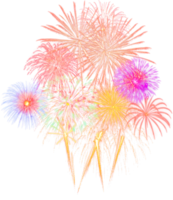 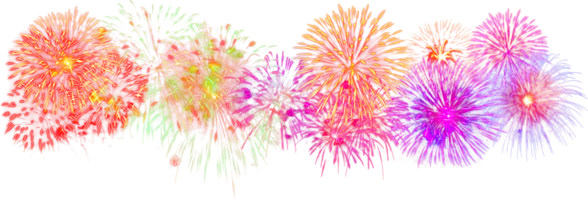

**Now this is the result we were all waiting for. It is surprisingly good. Nevertheless the dataset is really chaotic and sometimes with big-big errors (for example price of some cars is between 0 and 10), we managed to train model for really good result.**

We are fitting the model with data and dumping weights to file to use them later in Qt.

In [330]:
XGBRFRegressor_model.fit(X_train, y_train)
joblib.dump(XGBRFRegressor_model, 'weights_variables/XGBRFRegressor_model.joblib')
print("weights are dumped")

weights are dumped


- We make a prediction by fitted model
- We summarize the prediction

In [331]:
y_pred_xgbf = XGBRFRegressor_model.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred_xgbf})
print(comparison_df.head(10))

   Actual     Predicted
0   35617  28667.808594
1   10036   8553.345703
2   24709  20101.402344
3   19384  15357.812500
4    4861  10668.125977
5   13630  17033.730469
6     549   1547.928345
7     314  11433.747070
8    3763   4594.264160
9    8781   6285.929688


Let us plot actual and predicted values and see if it stays along diagonal, because it it is so, then it is well trained.

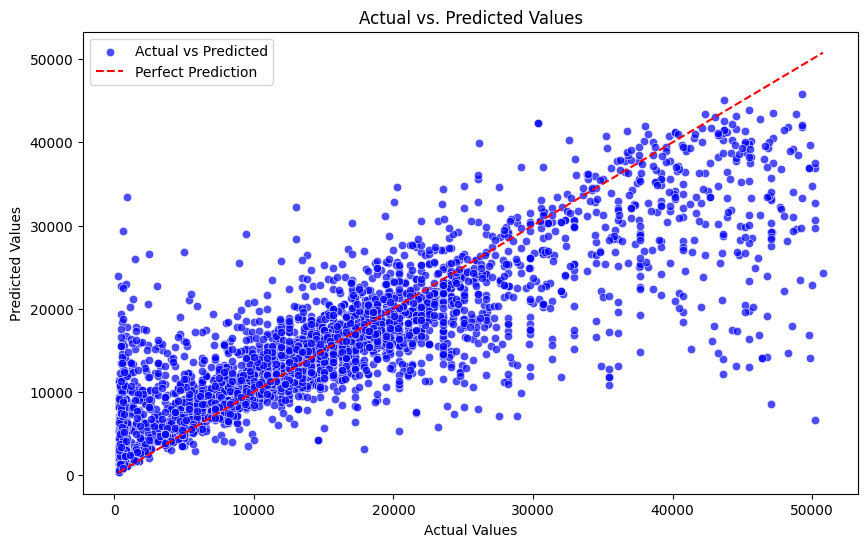

In [332]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=comparison_df, alpha=0.7, marker='o', color='blue', label='Actual vs Predicted')
plt.plot([min(comparison_df['Actual']), max(comparison_df['Actual'])], [min(comparison_df['Actual']), max(comparison_df['Actual'])], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Overall, values are along `perfect prediction` line, but the are a lot of error after the price is more than **30000**.

## <div align = "center">**Brief summary**<div/>

Work is done. We have:
- uploaded data from csv file
- seen tendencies in data
- inspected for outliers
- made box plots to see if outliers are still major problem
- plotted data to check how data is organized and analyzed correlation between columns
- trained models
- saved weights of models for future work in Qt
- checked the result of each model by measuring Root Mean Square Error